<a href="https://colab.research.google.com/github/rafael2673/AEDII/blob/main/U1T4/trabalho4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install osmnx

Quão conectada é a rede viária de Natal?
Podemos responder essa pergunta analisando o número de componentes conectados. Uma cidade altamente conectada terá poucos componentes desconectados.

Qual é o tamanho do maior componente conectado na rede viária?
O tamanho do Giant Connected Component indica a parte mais significativa da rede em termos de conectividade.

Qual é o comprimento médio dos caminhos mais curtos na rede?
O comprimento médio dos caminhos mais curtos oferece uma ideia de quão fácil é atravessar a cidade usando a rede viária.

Qual o diâmetro da rede viária de Natal?
O diâmetro indica a maior distância possível entre dois pontos na rede, refletindo os pontos mais distantes no maior componente conectado.

Qual o coeficiente de aglomeração da rede viária?
Um alto coeficiente de aglomeração pode indicar que a rede tem uma estrutura altamente interconectada, característica importante em redes com redundância de caminhos.

A rede viária de Natal possui clusters ou comunidades bem definidas?
Com base no coeficiente de aglomeração e na análise de componentes fortemente conectados (SCC) e componentes fracamente conectados (WCC), podemos inferir a presença de comunidades ou áreas com alta densidade de conexões.

Qual é a distribuição das distâncias entre pontos na rede?
Usando a métrica de comprimento médio dos caminhos mais curtos, podemos identificar se a cidade tem uma estrutura compacta ou se possui distâncias grandes entre algumas regiões.

# 1. Número Total de Componentes Conectados (Number of Connected Components)

In [20]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Baixar o grafo de ruas da cidade de Natal-RN
G = ox.graph_from_place("Natal, Rio Grande do Norte, Brazil", network_type="drive")

# Calcula o número total de componentes conectados no grafo
num_connected_components = nx.number_connected_components(G.to_undirected())
print(f"Número Total de Componentes Conectados: {num_connected_components}")

Número Total de Componentes Conectados: 1


# 2. Componentes Conectados (Connected Components)

In [21]:
# Identifica e imprime cada componente conectado individualmente

connected_components = list(nx.connected_components(G.to_undirected()))

data = []

# Iterate through each connected component
for i, component in enumerate(connected_components):
  # Iterate through each node in the component
  for node in component:
    # Append the component number and node ID to the data list
    data.append({'Component': i + 1, 'Node': node})

# Create the DataFrame
df_components = pd.DataFrame(data)

# Display the first 5 rows
df_components.head()

,Component,Node
0,1,6760792067
1,1,6760792068
2,1,7189397509
3,1,7189397510
4,1,7189397513


# 3. Giant Connected Component (GCC)

In [22]:

# Identificar o maior componente conectado
gcc = max(connected_components, key=len)
G_gcc = G.subgraph(gcc).copy()
print(f"Total de nós no Giant Connected Component: {len(G_gcc.nodes)}")

Total de nós no Giant Connected Component: 18662


# 4. Coeficiente de Aglomeração Médio (Clustering Coefficient)

In [24]:
# Calcula o coeficiente de aglomeração médio para o grafo
G_simple = nx.Graph(G)  # Remove as múltiplas arestas
clustering_coeff = nx.average_clustering(G_simple)
print(f"Coeficiente de Aglomeração Médio: {clustering_coeff}")

Coeficiente de Aglomeração Médio: 0.030691601471796344


# 5. Componente Fortemente Conectado (SCC)

In [25]:
# Encontra o maior componente fortemente conectado, se o grafo for direcionado
if nx.is_directed(G):
    scc = max(nx.strongly_connected_components(G), key=len)
    G_scc = G.subgraph(scc).copy()
else:
    # Para grafos não direcionados, usa o maior componente conectado (GCC)
    G_scc = G_gcc
print(f"Número de nós no SCC: {len(G_scc.nodes)}")

Número de nós no SCC: 18630


# 6. Comprimento Médio dos Caminhos Mais Curtos (Average Shortest Path Length)

In [36]:
# Calcula o comprimento médio dos caminhos mais curtos no SCC ou GCC
avg_shortest_path_length = nx.average_shortest_path_length(G_scc)
print(f"Comprimento Médio dos Caminhos Mais Curtos (SCC): {avg_shortest_path_length}")

Comprimento Médio dos Caminhos Mais Curtos (SCC): 94.78838458740661


# 7. Diâmetro da Rede (Diameter)

In [37]:
# Calcula o diâmetro da rede para o SCC ou GCC
diameter = nx.diameter(G_scc)
print(f"Diâmetro da Rede: {diameter}")

Diâmetro da Rede: 282


# 8. Comprimento do Caminho Mais Curto (Shortest Path Length)

Comprimento do Caminho Mais Curto: 16675.079000000012 metros


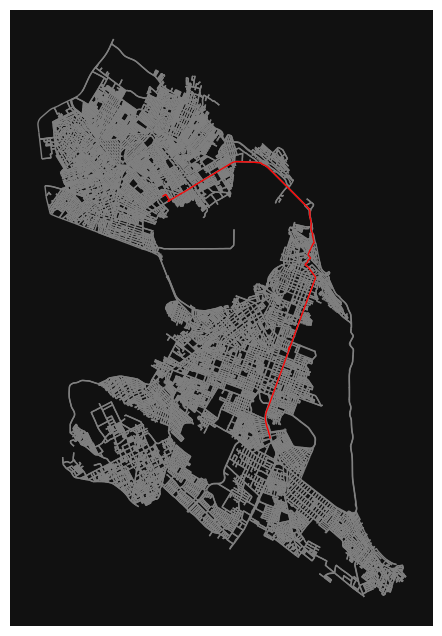

In [38]:
import matplotlib.pyplot as plt

# Defina as coordenadas dos dois locais
lat1, lon1 = -5.757762, -35.247343  # Coordenadas do ponto inicial
lat2, lon2 = -5.841354, -35.210656  # Coordenadas do ponto final

# Obtenha os nós mais próximos das coordenadas fornecidas
node_start = ox.distance.nearest_nodes(G, lon1, lat1)
node_end = ox.distance.nearest_nodes(G, lon2, lat2)
# Verifique se existe um caminho
if nx.has_path(G, node_start, node_end):
    # Comprimento do caminho mais curto
    shortest_path_length = nx.shortest_path_length(G, source=node_start, target=node_end, weight='length')
    print(f"Comprimento do Caminho Mais Curto: {shortest_path_length} metros")

    # Obtenha a lista de nós no caminho mais curto
    shortest_path = nx.shortest_path(G, source=node_start, target=node_end, weight='length')
    #print(f"Caminho Mais Curto: {shortest_path}")

    # Construindo `path_edges` com as chaves `k`
    path_edges = []
    for u, v in zip(shortest_path[:-1], shortest_path[1:]):
        # Para cada par (u, v), pegamos as chaves k existentes entre eles
        edge_data = G.get_edge_data(u, v)
        for k in edge_data:
            path_edges.append((u, v, k))  # Adiciona o nó inicial, final e a chave k

    # Plotando o grafo completo e o caminho mais curto
    fig, ax = ox.plot_graph(G, node_size=0, edge_color="gray", show=False)

    # Plotando o caminho em vermelho no mesmo mapa
    ox.plot_graph(G.edge_subgraph(path_edges), node_size=0, edge_color="red", ax=ax, show=False)

    # Calculando os limites de exibição com base nas coordenadas dos nós
    node_points = [G.nodes[node]['y'] for node in G.nodes], [G.nodes[node]['x'] for node in G.nodes]
    west, east = min(node_points[1]), max(node_points[1])
    south, north = min(node_points[0]), max(node_points[0])

    # Ajuste de visualização para cobrir toda a área de Natal
    margin = 0.01  # Margem de 1% para mostrar mais área ao redor
    ax.set_xlim(west - margin, east + margin)
    ax.set_ylim(south - margin, north + margin)

    # Exibindo o gráfico
    plt.show()
else:
    print(f"Não existe um caminho entre os nós {node_start} e {node_end}.")

# 9. Ciclos (Cycles)

In [29]:
# Detecta ciclos no grafo (se existirem) e destaca as arestas dos ciclos
try:
    cycle_nodes = list(nx.find_cycle(G, orientation="ignore"))
    # Extract edges from the cycle of nodes
    cycle_edges = [(cycle_nodes[0][i], cycle_nodes[0][(i + 1) % len(cycle_nodes[0])]) for i in range(len(cycle_nodes[0]))]
    print(f"Ciclo encontrado: {cycle_edges}")
    # Destacando as arestas do ciclo em vermelho
    for u, v in cycle_edges:
        if G.has_edge(u, v):
            G[u][v][0]['color'] = 'red'
except nx.NetworkXNoCycle:
    print("Nenhum ciclo encontrado na rede.")

Ciclo encontrado: [(560206840, 560206841), (560206841, 0), (0, 'forward'), ('forward', 560206840)]


# 10. Busca em Largura (BFS)

In [30]:
# Realiza uma busca em largura (BFS) a partir de um nó inicial
start_node = list(G.nodes())[0]
bfs_edges = list(nx.bfs_edges(G, start_node))

# Obter as arestas com o índice 'k' para cada par de nós (u, v)
bfs_edges_with_keys = []
for u, v in bfs_edges:
    for k in G[u][v]:
        bfs_edges_with_keys.append((u, v, k))

# Cria um subgrafo BFS com essas arestas para visualização
G_bfs = G.edge_subgraph(bfs_edges_with_keys).copy()

# 11. Busca em Profundidade (DFS)

In [31]:
# Realiza uma busca em profundidade (DFS) a partir do nó inicial
dfs_edges = list(nx.dfs_edges(G, start_node))
G_dfs = G.edge_subgraph([(u, v, 0) for u, v in dfs_edges]).copy()

# 12. Componente Fracamente Conectado (WCC)

Número de Componentes Fracamente Conectados: 1


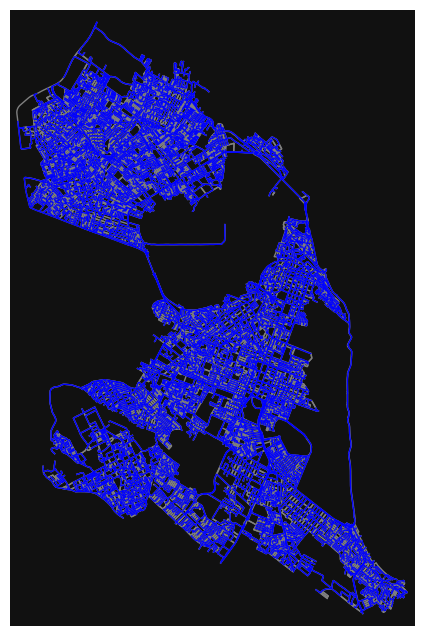

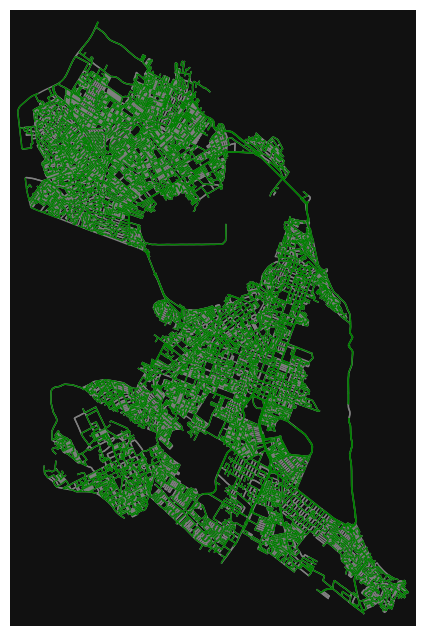

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [34]:
# Calcula o número de componentes fracamente conectados para grafos direcionados
if nx.is_directed(G):
    wcc = list(nx.weakly_connected_components(G))
    print(f"Número de Componentes Fracamente Conectados: {len(wcc)}")

# Plotar o grafo completo e destacar componentes BFS e DFS
fig, ax = ox.plot_graph(G, node_size=0, edge_color="gray", show=False)
ox.plot_graph(G_bfs, node_size=0, edge_color="blue", ax=ax, show=True)

fig, ax = ox.plot_graph(G, node_size=0, edge_color="gray", show=False)
ox.plot_graph(G_dfs, node_size=0, edge_color="green", ax=ax, show=True)